<a href="https://colab.research.google.com/github/04-AhmadThariqRamadhan/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AHMAD THARIQ RAMADHAN / 02 / 2041720200 / TI-3B

In [24]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv_imshow
from PIL import Image as im

##Buat Global trsold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

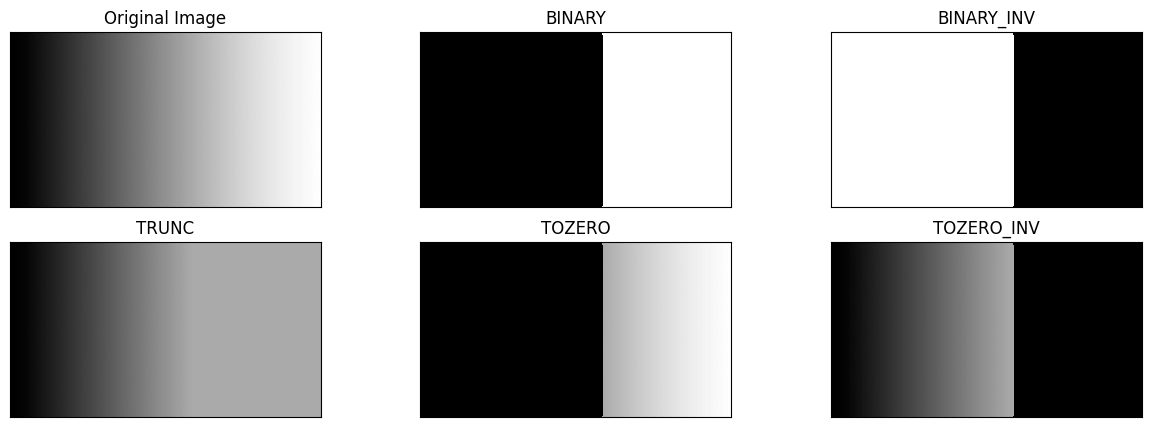

In [20]:
# image
input_image = cv.imread('/content/drive/MyDrive/images/gradient.jpg')
trs1 = input_image.copy()
trs2 = input_image.copy()
trs3 = input_image.copy()
trs4 = input_image.copy()
trs5 = input_image.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [input_image, trs1, trs2, trs3, trs4, trs5]

trs = 170

def globaltrsold(trsold, gambar, type):
  for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
      for c in range(input_image.shape[2]):
        # Binary trsold
        if(type == 1):
          if(gambar[i,j,c] > trsold):
            gambar[i,j,c] = 255
          else:
            gambar[i,j,c] = 0
        # Binary-Inverted trsold
        elif(type == 2):
          if(gambar[i,j,c] > trsold):
            gambar[i,j,c] = 0
          else:
            gambar[i,j,c] = 255
        # Truncate trsold
        elif(type == 3):
          if(gambar[i,j,c] > trsold):
            gambar[i,j,c] = trsold
          else:
            gambar[i,j,c] = gambar[i,j,c]
        # trsold To Zero
        elif(type == 4):
          if(gambar[i,j,c] > trsold):
            gambar[i,j,c] = gambar[i,j,c]
          else:
            gambar[i,j,c] = 0
        # trsold To Zero – Inverted
        elif(type == 5):
          if(gambar[i,j,c] > trsold):
            gambar[i,j,c] = 0
          else:
            gambar[i,j,c] = gambar[i,j,c]
  return gambar

# Memanggil fungsi globaltrsold
for a in range(1, len(images)):
  images[a] = globaltrsold(trs, images[a], a)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

##Buat Otsu trsolding tanpa menggunakan Library. Tampilkan juga nilai trshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global trsold biasa).

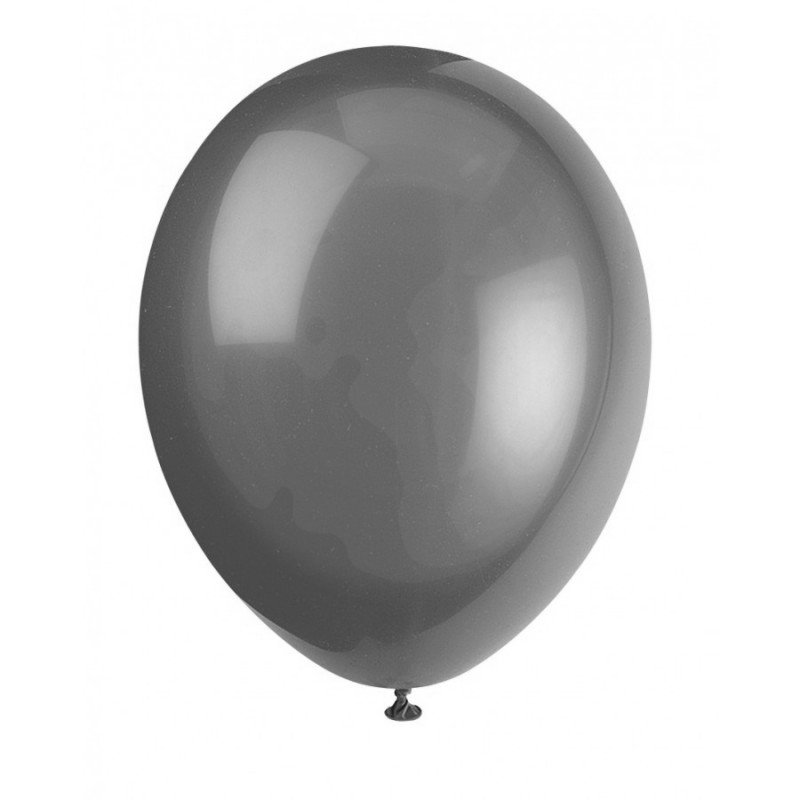

In [26]:
gambar_ballon = cv.imread('/content/drive/MyDrive/images/Salinan balloon.jpg',0)
cv_imshow(gambar_ballon)

<ipython-input-27-7fcfba64ab8c>:17: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


<Figure size 1500x500 with 0 Axes>

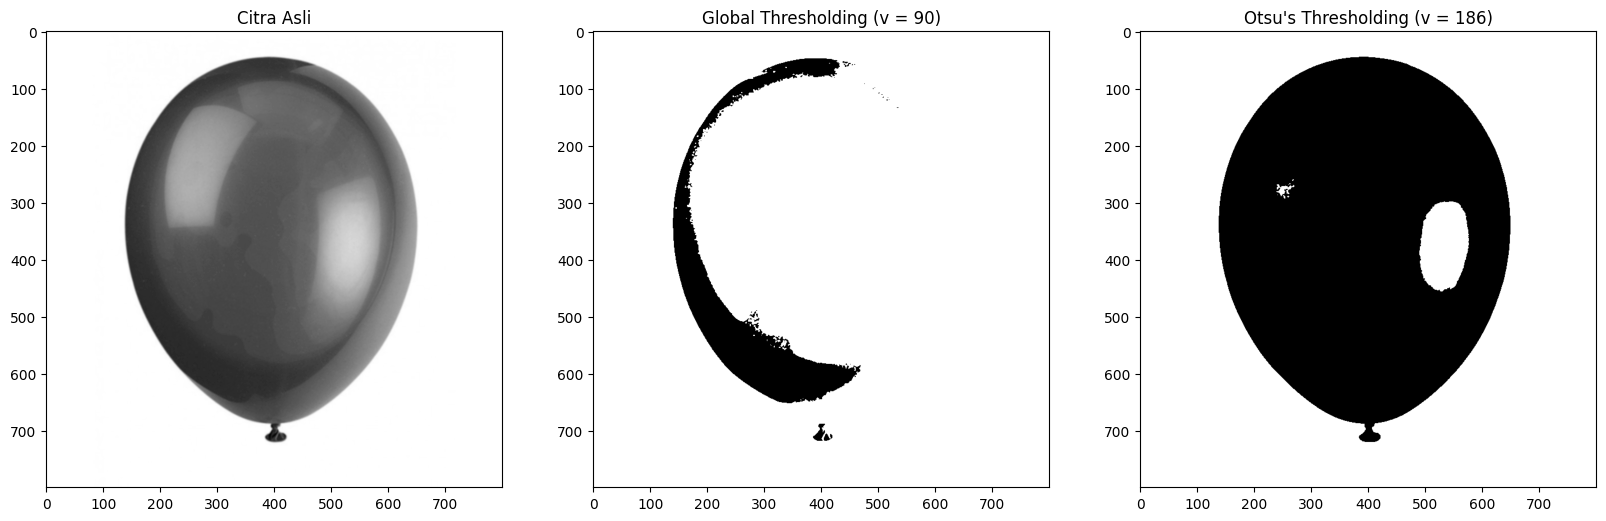

In [27]:
# Hitung nilai trsold menggunakan Otsu trsolding secara manual
gambar_ballon = cv. GaussianBlur (gambar_ballon, (5,5),0)

histogrm = cv.calcHist([gambar_ballon],[0],None,[256], [0,256]) 
hist_norm = histogrm.ravel()/histogrm.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
variationmax = 0 
fn_min = np.inf 
trs = -1 
for i in range(0,187):
  wb += histogrm[i] 
  wf = (gambar_ballon.shape[0]*gambar_ballon.shape[1]) - wb 
  sumb += (i*histogrm[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  varbetween = wb * wf * (mb - mf) * (mb - mf) 
  if (varbetween>variationmax):
    variationmax = varbetween
    trs = i 
x = ("Otsu's trsolding (v = ")+str(trs)+")" 
ret, th1 = cv.trsold(gambar_ballon, 90, 255, cv.trs_BINARY)
ret, th2 = cv.trsold (gambar_ballon, trs, 255, cv. trs_BINARY)

titles = ['Citra Asli', 'Global trsolding (v = 90)', x] 
citra3 = [gambar_ballon, th1, th2]
plt.figure(figsize = (15,5))

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
plt.show()

##Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

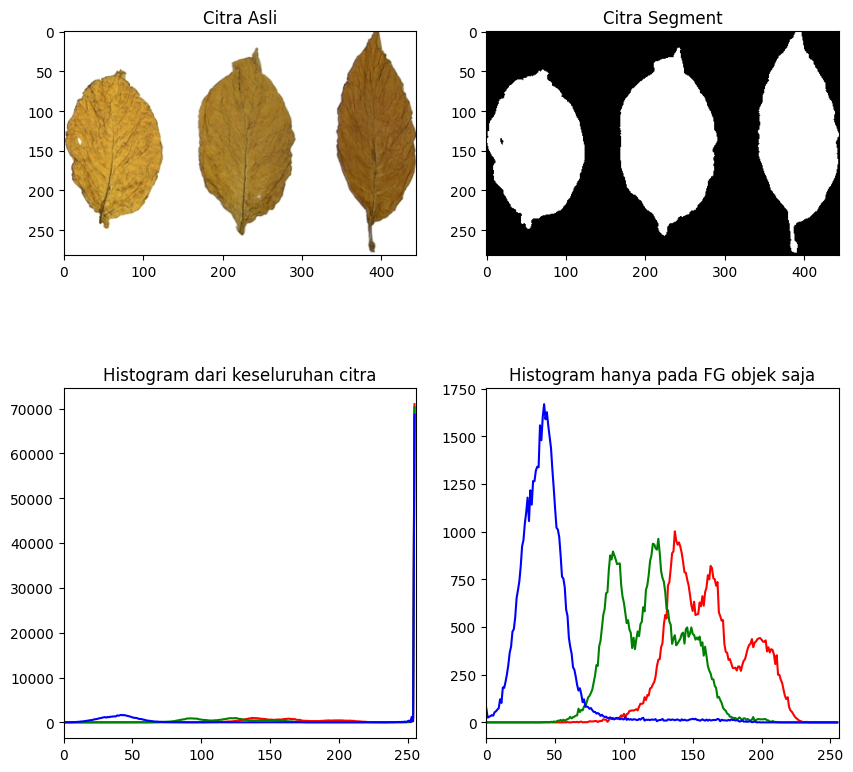

In [29]:
# Membaca gambar dari file
gambar3 = cv.imread('/content/drive/MyDrive/images/Salinan tobacco.jpg')
gambar3 = cv.cvtColor(gambar3,cv.COLOR_BGR2RGB) 
gambar_gray = cv.cvtColor(gambar3, cv.COLOR_BGR2GRAY)

_, mask = cv.trsold(gambar_gray, 200, 255, cv.trs_BINARY_INV)

foreground = cv.bitwise_and(gambar3, gambar3, mask=mask)

hist_channels = cv.split(foreground)
hist_list = []
for i in range(len(hist_channels)):
    hist = cv.calcHist([hist_channels[i]], [0], None, [256], [0, 256])
    hist_list.append(hist)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(gambar3) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment')

color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist_full = cv.calcHist([gambar3], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3)
    plt.plot(hist_full, color=col)
    plt.xlim([0, 256])
    plt.title('Histogram dari keseluruhan citra')

    hist_fg = cv.calcHist([gambar3], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4)
    plt.plot(hist_fg, color=col)
    plt.xlim([0, 256])
    plt.title('Histogram hanya pada FG objek saja')

plt.show()

##Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

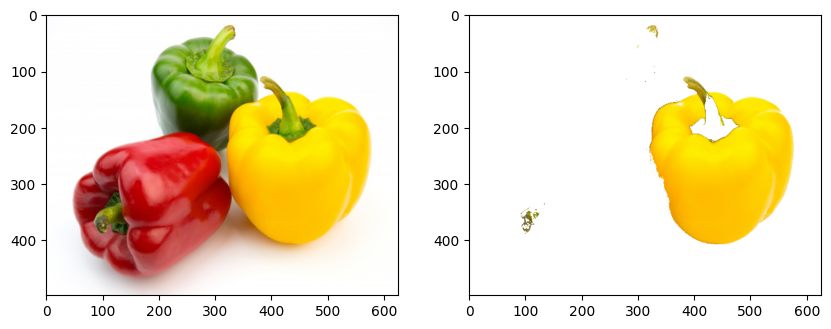

In [30]:
gambar4 = cv.imread('/content/drive/MyDrive/images/peppers.jpg')

gambar4 = cv.cvtColor(gambar4, cv.COLOR_BGR2RGB)

hsv = cv.cvtColor(gambar4, cv.COLOR_RGB2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

mask = cv.inRange(hsv, lower_yellow, upper_yellow)

result = cv.bitwise_and(gambar4, gambar4, mask=mask)

background = np.ones_like(gambar4) * 255
background_mask = cv.bitwise_not(mask)
background_result = cv.bitwise_and(background, background, mask=background_mask)

final_result = cv.bitwise_or(result, background_result)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(gambar4)
plt.subplot(1, 2, 2), plt.imshow(final_result)
plt.show()

##Buka File crossword.jpg. Dengan pengetahuan tentang trsolding yang sudah anda pelajari. Lakukan trsolding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

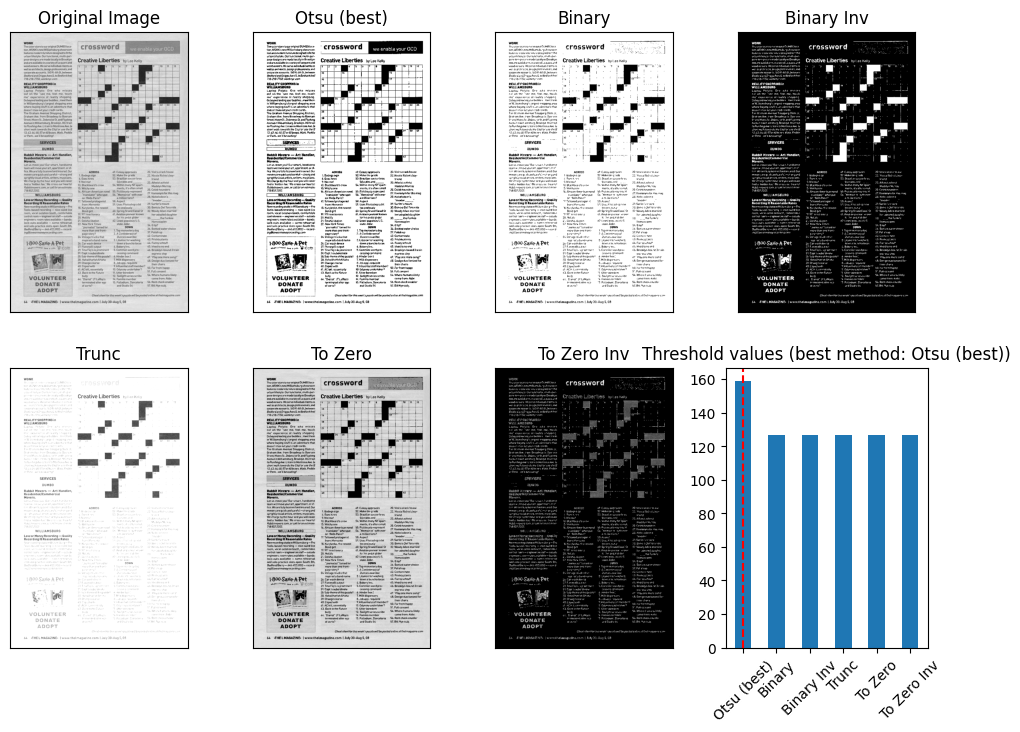

In [31]:
gambar5 = cv.imread('/content/drive/MyDrive/images/crossword.jpg', cv.IMREAD_GRAYSCALE)

methods = [
    ('Otsu (best)', cv.trs_BINARY+cv.trs_OTSU),
    ('Binary', cv.trs_BINARY),
    ('Binary Inv', cv.trs_BINARY_INV),
    ('Trunc', cv.trs_TRUNC),
    ('To Zero', cv.trs_TOZERO),
    ('To Zero Inv', cv.trs_TOZERO_INV)
]
trsold_values = []

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(gambar5, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

for i, (title, method) in enumerate(methods):
    ret, th = cv.trsold(gambar5, 127, 255, method)
    trsold_values.append(ret)
    
    plt.subplot(2, 4, i+2)
    plt.imshow(th, 'gray')
    plt.title(title)
    plt.xticks([]), plt.yticks([])

best_trsold_index = trsold_values.index(max(trsold_values))
best_trsold = methods[best_trsold_index][0]

plt.subplot(2, 4, 8)
plt.bar([t[0] for t in methods], trsold_values, width=0.5, align='center')
plt.axvline(x=best_trsold, color='r', linestyle='--')
plt.title(f"trsold values (best method: {best_trsold})")
plt.xticks(rotation=45)

plt.show()